In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.transform
import os

from sklearn import model_selection
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, add, BatchNormalization
from tensorflow.keras.optimizers import Adam 

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

keras.__version__

'2.7.0'

# Study and preprocess the data

In [8]:
data_location = 'UCMerced_LandUse/Images'
category_names = os.listdir(data_location)

In [3]:
for category in category_names: 
    image_path = data_location + '/' + category
    print(category, ": ", len(os.listdir(image_path)))

agricultural :  100
airplane :  100
baseballdiamond :  100
beach :  100
buildings :  100
chaparral :  100
denseresidential :  100
forest :  100
freeway :  100
golfcourse :  100
harbor :  100
intersection :  100
mediumresidential :  100
mobilehomepark :  100
overpass :  100
parkinglot :  100
river :  100
runway :  100
sparseresidential :  100
storagetanks :  100
tenniscourt :  100


In [4]:
image_sizes = {}
for category in category_names: 
    images = os.listdir(data_location + '/' + category) 
    for image in images: 
        image_path = data_location + '/' + category + '/' + image
        orignal_image_size = plt.imread(image_path).shape
        if orignal_image_size in image_sizes: 
            image_sizes[orignal_image_size] += 1 
        else: 
            image_sizes[orignal_image_size] = 1
        
image_sizes

{(256, 256, 3): 2056,
 (256, 253, 3): 6,
 (253, 256, 3): 3,
 (256, 252, 3): 2,
 (256, 250, 3): 2,
 (255, 256, 3): 1,
 (247, 247, 3): 9,
 (251, 256, 3): 5,
 (257, 257, 3): 1,
 (256, 249, 3): 1,
 (254, 256, 3): 2,
 (256, 255, 3): 4,
 (247, 256, 3): 1,
 (249, 256, 3): 2,
 (256, 254, 3): 3,
 (256, 242, 3): 1,
 (256, 247, 3): 1}

In [6]:
IMAGE_SIZE = 64

In [21]:
def process_image(image_folder, save_x, save_y, i): 
    images = os.listdir(image_folder) 
    for image in images: 
        image_path = image_folder + '/' + image
        orignal_image_size = plt.imread(image_path)
        resized_image = skimage.transform.resize(orignal_image_size, (IMAGE_SIZE, IMAGE_SIZE), preserve_range = False)
        arr = np.asarray(resized_image)
        save_x.append(arr)
        save_y.append([i])

In [22]:
save_x = [] 
save_y = [] 
i = 0 
for category in category_names: 
    image_folder = data_location + '/' + category
    process_image(image_folder, save_x, save_y, i)
    i += 1 

In [30]:
np.save('ProcessedData/preprocessed_x.npy', save_x)
np.save('ProcessedData/preprocessed_y.npy', save_y)

# Split data for training

In [2]:
save_x = np.load('ProcessedData/preprocessed_x.npy')
save_y = np.load('ProcessedData/preprocessed_y.npy')

In [35]:
labels = to_categorical(save_y, number_classes)

print('One-hot encoded labels: \n')
for i in range(1,(number_classes)*100+1, 100):
    print(labels[i])

One-hot encoded labels: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

In [36]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(save_x, labels, test_size=0.2, 
                                                                            stratify = labels, random_state=2021) 
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train, y_train, test_size=0.25, 
                                                                          stratify = y_train, random_state=2021) 

# Build the model

In [44]:
number_classes = len(category_names)
number_epoches = 200
batch_size = 32
learning_rate = 0.001 

batches_per_epoch = y_train.shape[0] // batch_size
validation_steps = y_val.shape[0] // batch_size

In [45]:
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
pool_size = (2, 2) 
kernel_size = (3, 3)
prob_drop_hidden = 0.5 

def CNN_baseline():

    model = Sequential()

    # conv1 layer
    model.add(Conv2D(filters=32, kernel_size=kernel_size, activation='relu', padding = 'same', input_shape=input_shape))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    # conv2 layer
    model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='relu', padding = 'same'))    
    model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2)))

    model.add(Flatten())

    # fc1 layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=prob_drop_hidden))

    # The output of the model (softmax)
    model.add(Dense(number_classes, activation='softmax'))

    return model

model_CNN_baseline = CNN_baseline()
model_CNN_baseline.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_11 (Dense)            (None, 64)               

In [46]:
model_CNN_baseline.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) 

checkpoint_best_model = 'SavedModels/baseline.hdf5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=16)
mc = ModelCheckpoint(checkpoint_best_model, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [47]:
print('training...')

history = model_CNN_baseline.fit(
                x=x_train,
                y=y_train,
                steps_per_epoch=batches_per_epoch, 
                epochs=number_epoches, 
                validation_data=(x_val, y_val),
                validation_steps=validation_steps,
                callbacks=[es, mc],
                verbose = 2,
                )

print('done')

training...
Epoch 1/200

Epoch 00001: val_accuracy improved from -inf to 0.10000, saving model to SavedModels\baseline.hdf5
39/39 - 4s - loss: 3.0679 - accuracy: 0.0429 - val_loss: 3.0372 - val_accuracy: 0.1000 - 4s/epoch - 113ms/step
Epoch 2/200

Epoch 00002: val_accuracy improved from 0.10000 to 0.13095, saving model to SavedModels\baseline.hdf5
39/39 - 3s - loss: 3.0164 - accuracy: 0.0730 - val_loss: 2.9800 - val_accuracy: 0.1310 - 3s/epoch - 89ms/step
Epoch 3/200

Epoch 00003: val_accuracy did not improve from 0.13095
39/39 - 3s - loss: 2.9471 - accuracy: 0.0825 - val_loss: 2.9421 - val_accuracy: 0.1190 - 3s/epoch - 88ms/step
Epoch 4/200

Epoch 00004: val_accuracy improved from 0.13095 to 0.16190, saving model to SavedModels\baseline.hdf5
39/39 - 4s - loss: 2.8585 - accuracy: 0.1095 - val_loss: 2.7234 - val_accuracy: 0.1619 - 4s/epoch - 93ms/step
Epoch 5/200

Epoch 00005: val_accuracy improved from 0.16190 to 0.16429, saving model to SavedModels\baseline.hdf5
39/39 - 4s - loss: 2.7


Epoch 00042: val_accuracy did not improve from 0.53333
39/39 - 4s - loss: 0.9670 - accuracy: 0.6492 - val_loss: 2.2007 - val_accuracy: 0.5000 - 4s/epoch - 100ms/step
Epoch 43/200

Epoch 00043: val_accuracy did not improve from 0.53333
39/39 - 4s - loss: 0.9118 - accuracy: 0.6706 - val_loss: 2.1668 - val_accuracy: 0.5000 - 4s/epoch - 92ms/step
Epoch 44/200

Epoch 00044: val_accuracy did not improve from 0.53333
39/39 - 4s - loss: 0.9901 - accuracy: 0.6254 - val_loss: 2.2280 - val_accuracy: 0.4976 - 4s/epoch - 92ms/step
Epoch 45/200

Epoch 00045: val_accuracy did not improve from 0.53333
39/39 - 4s - loss: 0.9910 - accuracy: 0.6508 - val_loss: 2.2529 - val_accuracy: 0.4714 - 4s/epoch - 97ms/step
Epoch 46/200

Epoch 00046: val_accuracy did not improve from 0.53333
39/39 - 4s - loss: 0.9425 - accuracy: 0.6548 - val_loss: 2.1909 - val_accuracy: 0.4833 - 4s/epoch - 91ms/step
Epoch 47/200

Epoch 00047: val_accuracy did not improve from 0.53333
39/39 - 3s - loss: 0.8883 - accuracy: 0.6865 - v

# Evaluate the model

In [49]:
saved_model = load_model(checkpoint_best_model)

_, acc = saved_model.evaluate(x_train, y_train, verbose=0)
print('Model evaluate on train, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(x_val, y_val, verbose=0)
print('Model evaluate on val, Accuracy %.3f' % (acc * 100.0))
_, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Model evaluate on test, Accuracy %.3f' % (acc * 100.0))

Model evaluate on train, Accuracy 97.143
Model evaluate on val, Accuracy 53.333
Model evaluate on test, Accuracy 47.143


# Predict on testing set

In [55]:
predictions = saved_model.predict(x=x_test, batch_size=batch_size)
y_pred = to_categorical(np.argmax(predictions, axis=1), number_classes)
y_pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0.], dtype=float32)

In [56]:
# classification report
report_string = classification_report(y_test, y_pred, target_names=category_names)
print(report_string)

                   precision    recall  f1-score   support

     agricultural       0.58      0.70      0.64        20
         airplane       0.62      0.50      0.56        20
  baseballdiamond       0.71      0.25      0.37        20
            beach       0.94      0.85      0.89        20
        buildings       0.35      0.30      0.32        20
        chaparral       0.67      0.90      0.77        20
 denseresidential       0.22      0.20      0.21        20
           forest       0.65      0.65      0.65        20
          freeway       0.46      0.65      0.54        20
       golfcourse       0.46      0.30      0.36        20
           harbor       0.52      0.65      0.58        20
     intersection       0.75      0.30      0.43        20
mediumresidential       0.30      0.40      0.34        20
   mobilehomepark       0.36      0.40      0.38        20
         overpass       0.53      0.45      0.49        20
       parkinglot       0.48      0.75      0.59       

In [57]:
confmat = confusion_matrix( y_test.argmax(axis=1), predictions.argmax(axis=1))
confmat

array([[14,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         1,  2,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,
         0,  2,  1,  3,  1],
       [ 4,  0,  5,  0,  0,  0,  0,  0,  1,  3,  0,  0,  0,  0,  2,  0,
         3,  1,  0,  0,  1],
       [ 1,  0,  0, 17,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  6,  0,  4,  0,  0,  1,  0,  0,  1,  3,  0,  4,
         0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  4,  1,  1,  0,  1,  0,  2,  3,  1,  2,
         0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  1,  0,  2,  0,  0,  0,
         3,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  0, 13,  0,  0,  0,  1,  0,  0,  0,
         0,  1,  1,  1,  0],
       [ 3,  0,  2,  0,  0,  0,  0,  1,  0,  6,  0,  0,  0,  0,  1,  0,
         4,  1,  1,

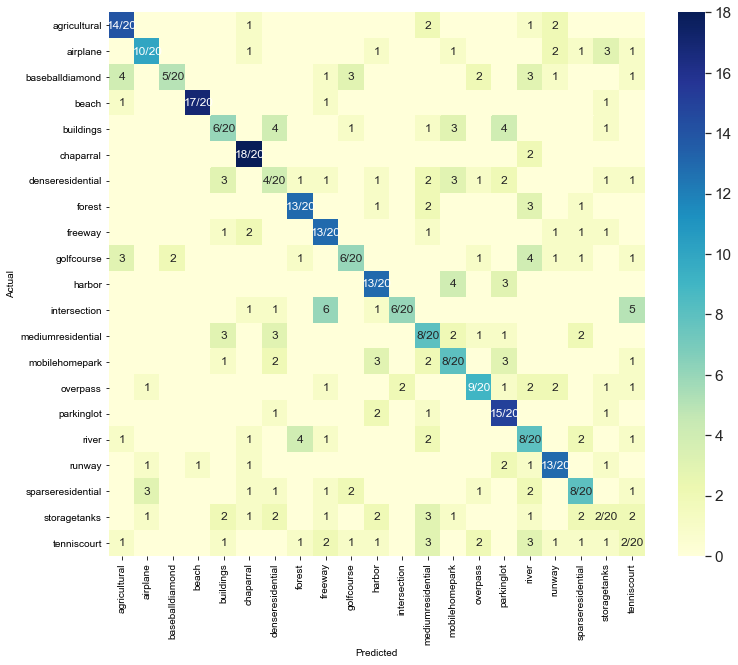

In [71]:
def plot_cm(y_true, y_pred, figsize=(12,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%d/%d' % (c, s)
            elif c == 0:
                annot[i, j] = ''
            elif i<j:
                annot[i, j] = '%d' % (c)
            else:
                annot[i, j] = '%d' % (c)
    #cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm = pd.DataFrame(cm, index=category_names, columns=category_names)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax, annot_kws={"fontsize":12})
    
plot_cm(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [69]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(number_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

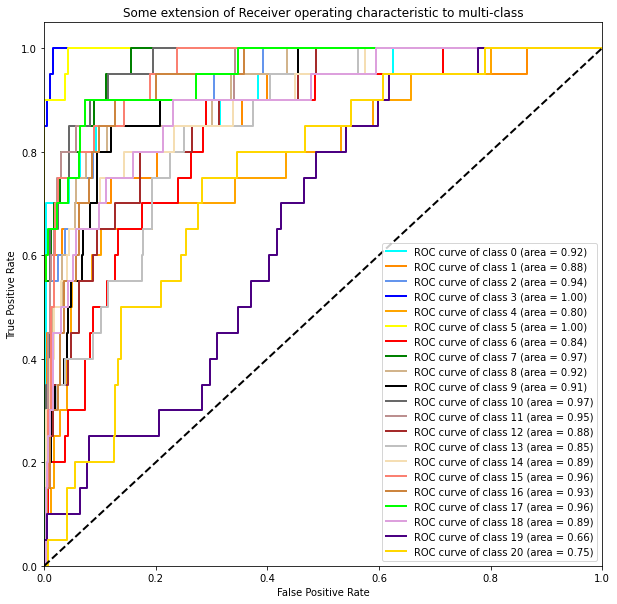

In [70]:
plt.figure(figsize=(10,10))

colors = ['aqua', 'darkorange', 'cornflowerblue', 'blue', 'orange', 'yellow', 'red', 'green', 'tan', 'black', 
         'dimgray', 'rosybrown', 'brown', 'silver', 'wheat', 'salmon', 'peru', 'lime', 'plum', 'indigo', 
         'gold']

for i, color in zip(range(number_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()